Titre: La La Land, Avis: enchanteur emporte monde rêve d'amour chansons sublimes interprétations acteurs exceptionnelles, Sentiment: positive
Titre: La La Land, Avis: malgré charme, land trop superficiel romantique goût personnages personnalité floue dialogues parfois vagues, Sentiment: negative
Titre: La La Land, Avis: comédie musicale envoûtante nostalgique célèbre l'amour rêves chansons magnifiques acteurs alchimie incroyable, Sentiment: positive
Titre: La La Land, Avis: l'amour rêves, chansons magnifiques emportent monde fantasmes chef-d'œuvre cinéma musical, Sentiment: positive
Titre: La La Land, Avis: malgré quelques moments inégal, land montre cinéma peut encore créer beaux rêves amour romantiques chansons sublimes, Sentiment: positive
Titre: La La Land, Avis: trop long complique lui-même répétitions scènes personnages personnalité floue dialogues parfois vagues, Sentiment: negative
Titre: La La Land, Avis: montre cinéma musical peut encore créer moments magiques chansons incroy

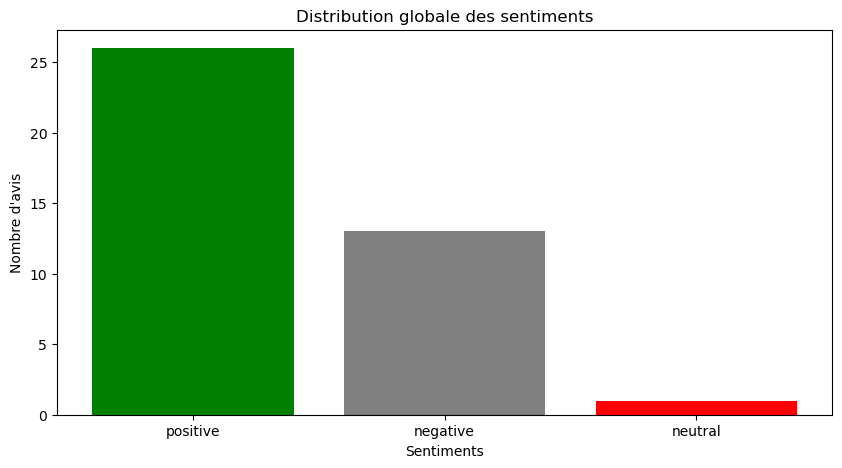

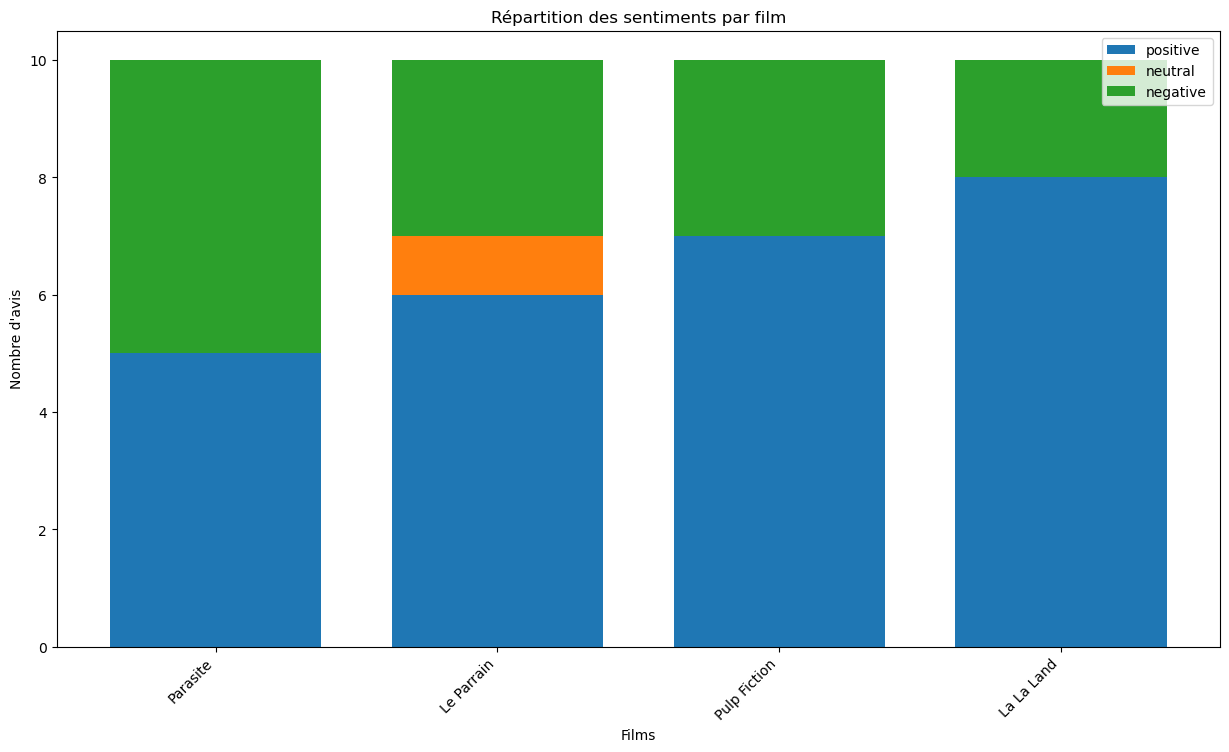

Device set to use cuda:0


Résumé pour 'Parasite': L'intrigue est complexe et les personnages sont attachants, malgré leur noirceur. Malgré son mérite pour dénoncer les inégalités sociales, le film est trop sombre and pessimiste. L'humour noir ne suffit pas à réchauffer l'atmosphère oppressante.

Résumé pour 'La La Land': La La Land est un film trop superficiel et romantique pour mon goût. Une comédie musicale envoûtante et nostalgique. Un film enchanteur qui nous emporte dans un monde de rêve et d'amour.

Résumé pour 'Le Parrain': Le Parrain est un film vieilli par sa violence et ses stéréotypes italo-américains. Un thriller politique puissant qui expose la corruption et le pouvoir criminel avec une profondeur rare.

Résumé pour 'Pulp Fiction': Pulp Fiction est un chef-d'œuvre du cinéma américain. L'humour noir et les dialogues cultes en font un classique. Ce film est trop long and se complique lui-même avec ses multiples intrigues non linéaires.



In [1]:
import json
import nltk
import re
import matplotlib.pyplot as plt
import string

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict, Counter
from transformers import pipeline

# Initialisation lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper 1: lemmatisation des mots
def lemmatize_words(word_list):
    """
    Effectue la lemmatisation d'une liste de mots.

    La lemmatisation consiste à réduire chaque mot à sa forme de base 
    ou son lemme (par exemple : "manges" devient "manger").
    Cette fonction utilise un objet `lemmatizer` prédéfini pour effectuer
    cette transformation.

    Args:
        word_list (list): Une liste de mots (chaînes de caractères) à lemmatiser.

    Returns:
        list: Une liste contenant les lemmes correspondants aux mots d'entrée.
    """
    # Utilise la méthode `lemmatize` de l'objet `lemmatizer` sur chaque mot de la liste
    return [lemmatizer.lemmatize(word) for word in word_list]

#Helper 2: transformation pluriels (simple) et formes feminines des mots
def get_females_and_plurals(word):
    """
    Génère les formes féminines et pluriels d'un mot donné en français.
    Permet de personnaliser les formes générées pour améliorer la lemmatisation 
    et mieux adapter les résultats à la langue française.
    
    Args:
        word (str): Le mot de base (singulier et masculin) à transformer.

    Returns:
        list: Une liste de toutes les formes possibles (masculin, féminin, pluriel).
    """
    # Initialisation d'un ensemble pour éviter les doublons
    forms = {word}
    
    # Ajout du pluriel si le mot ne se termine pas déjà par 's'
    if not word.endswith('s'):
        forms.add(word + 's')
    
    # Transformation des suffixes pour générer les formes féminines
    # Exemple : "acteur" -> "actrice"
    suffix_rules = {
        'eur': 'euse',  # Exemple : "danseur" -> "danseuse"
        'er': 'ère',    # Exemple : "boulanger" -> "boulangère"
        'teur': 'trice' # Exemple : "acteur" -> "actrice"
    }
    
    # Application de la première règle de suffixe correspondante
    for suffix, replacement in suffix_rules.items():
        if word.endswith(suffix):
            forms.add(re.sub(rf"{suffix}$", replacement, word))
            break  # Priorité à la première règle qui correspond

    # Retourne toutes les formes générées sous forme de liste
    return list(forms)

# Helper 3: Fonction pour lemmatizer, ajouter le pluriel et le feminin
def lemmatize_and_add_plurals_and_females(word_list):
    """
    Effectue la lemmatisation des mots et ajoute les formes féminines et pluriels correspondants.

    Cette fonction passe d'abord chaque mot de la liste à travers un processus de lemmatisation
    pour obtenir sa forme de base, puis génère les formes féminines et pluriels pour chaque mot lemmatisé.
    Les formes lemmatisées, féminines et pluriels sont combinées dans un ensemble pour éviter les doublons.

    Args:
        word_list (list): Une liste de mots (chaînes de caractères) à traiter.

    Returns:
        list: Une liste contenant les mots lemmatisés, leurs formes féminines et pluriels, sans doublons.
    """
    # Lemmatisation de la liste de mots
    lemmatized_words = lemmatize_words(word_list)
    
    # Créer un ensemble pour stocker les mots étendus (lemmas, pluriels, féminins) sans doublons grace a set
    extended_words = set(lemmatized_words)
    
    # Pour chaque mot lemmatisé, appliquer la transformation pour obtenir les formes féminines et pluriels
    for word in lemmatized_words:
        # Applique la fonction qui génère les formes féminines et pluriels
        forms = get_females_and_plurals(word)
        
        # Met à jour l'ensemble avec les nouvelles formes
        extended_words.update(forms)
    
    # Retourne une liste des mots étendus, après suppression des doublons
    return list(extended_words)

# Creation du lexicon/liste de mot avec traitement lemmatize_and_add_plurals_and_females
sentiment_lexicon = {
    "positive": lemmatize_and_add_plurals_and_females([
        "intelligence", "excellent", "bon", "génial", "super", "sublime", "bouleverse", "poétique",
        "formidable", "éblouissant", "incroyable", "passionnant", "émouvant", "brillant",
        "merveilleux", "fantastique", "extraordinaire", "remarquable", "admirable", "original",
        "splendide", "somptueux", "enchanteur", "captivant", "fascinant", "envoûtant", 
        "édifiant", "inspirant", "touchant", "émouvant", "bouleversant", "poignant", 
        "joie", "bonheur", "plaisir", "enthousiasme", "ravissement", "extase", 
        "béatitude", "euphorie", "exaltation", "jubilation", "réussi", "triomphant", 
        "victorieux", "couronné de succès", "fructueux", "productif", "efficace", "sans failles",
        "performant", "agréable", "plaisant", "délicieux", "savoureux", "rafraîchissant", 
        "revigorant", "exaltant", "grisant", "beau", "joli", "charmant", "gracieux", "contre l'ignorance",
        "élégant", "raffiné", "sublime", "magnifique", "chef-d'oeuvre", "chef-d'œuvre", "efficace", "culte",
        "exceptionel", "exceptionelle", "incroyable", "sublime", "fascinant", "attachant", "maîtrise", "rare", "inégalée"
    ]),
    "negative": lemmatize_and_add_plurals_and_females([
        "mauvais", "nul", "ennuyeux", "décevant", "raté", "plat", "long", "flou", "intrigues linéaires",
        "insipide", "incohérent", "stupide", "médiocre", "affreux", "horrible", "mais",
        "épouvantable", "désastreux", "catastrophique", "lamentable", "pitoyable", 
        "déplorable", "décevant", "déçu", "décevante", "soporifique", "monotone", 
        "répétitif", "lassant", "fatiguant", "indifférent", "long", "lent", "lourd", 
        "poussif", "laborieux", "fastidieux", "pénible", "faible", "pauvre", "médiocre", 
        "insipide", "fade", "plat", "creux", "vide", "superficiel", "artificiel", 
        "fabriqué", "forcé", "laid", "moche", "difforme", "repoussant", "hideux", 
        "grotesque", "vulgaire", "trivial", "tristesse", "colère", "déception", 
        "frustration", "amertume", "ressentiment", "haine", "mépris", "floue"
        "répulsion", "raté", "échoué", "vain", "futile", "inutile", "inefficace", "énervantes",
        "sans intérêt", "improductif", "stérile", "désagréable", "déplaisant", "pénible",
        "répugnants", "trop", "compliqué", "difficile", "trop", "vague", "trop long", "complique"
    ]),
    "neutral": lemmatize_and_add_plurals_and_females([
        "correct", "moyen", "passable", "acceptable", "satisfaisant", "convenable",
        "adéquat", "suffisant", "raisonnable", "indifférent", "neutre", "sans opinion", "incertain", "douteux", "ambigu", "suffisant", 
        "assez", "beaucoup", "peu", "malgré", "violence", "sombre", "sexe", "mort"
    ])
}

# Fonction pour ajouter dynamiquement des mots inconnus au lexique
def add_unknown_words_to_lexicon(avis, sentiment_lexicon):
    """
    Ajoute dynamiquement des mots inconnus au lexique de sentiments (positifs, négatifs, neutres).
    
    La fonction analyse un avis textuel pour extraire les mots non présents dans le lexique de sentiments
    déjà existant et les classe en fonction de leur polarité à l'aide de VADER. Si un mot a une polarité
    positive ou négative significative, il est ajouté dans les catégories correspondantes du lexique.

    Args:
        avis (str): Un avis ou un texte à analyser.
        sentiment_lexicon (dict): Un dictionnaire contenant les listes des mots classés par sentiment
                                  (clé 'positive', 'negative', 'neutral').

    Returns:
        dict: Le lexique de sentiments mis à jour avec les mots inconnus ajoutés dans les catégories appropriées.
    """
    sid = SentimentIntensityAnalyzer()  # Utilisation de VADER pour l'analyse de sentiment

    # Uniformisation du texte, retrait des ponctuations et conversion en minuscules
    words = avis.lower().translate(str.maketrans('', '', string.punctuation)).split()

    # Liste des stop words en français pour éviter d'ajouter des mots non pertinents
    stop_words = set(stopwords.words('french'))
    filtered_words = [word for word in words if word not in stop_words]  # Filtrage des stop words

    # Itération sur les mots filtrés pour ajouter les mots inconnus au lexique de sentiments
    for word in filtered_words:
        if word not in sentiment_lexicon["positive"] and word not in sentiment_lexicon["negative"]:
            # Analyser la polarité du mot avec VADER
            ss = sid.polarity_scores(word)

            if ss['compound'] > 0.2:  # Valeur seuil positive pour sentiment positif
                sentiment_lexicon["positive"].append(word)
            elif ss['compound'] < -0.2:  # Valeur seuil négative pour sentiment négatif
                sentiment_lexicon["negative"].append(word)
            else:
                sentiment_lexicon["neutral"].append(word)  # Sinon, considéré comme neutre

    # Retourner le lexique de sentiments mis à jour
    return sentiment_lexicon


# Nettoyage des reviews
def clean_avis(avis):
    """
    Nettoie un avis textuel en supprimant les stopwords, les caractères indésirables et les mots trop courts.
    
    La fonction transforme l'avis en minuscules, retire les ponctuations et les mots inutiles
    (stopwords) tout en filtrant les mots de longueur inférieure à 4 caractères. Elle utilise
    également un ensemble personnalisé de stopwords pour une meilleure adaptation au contexte.
    
    Args:
        avis (str): Un avis ou texte à nettoyer.

    Returns:
        str: L'avis nettoyé sous forme de chaîne de caractères.
    """
    # Chargement des stopwords en français
    stop_words = set(stopwords.words('french'))  # Liste des stopwords de base
    custom_stopwords = {"film", "histoire", "personnage", "acteur", "actrice"}  # Stopwords personnalisés (au cas ou)
    stop_words.update(custom_stopwords)  # Ajout des stopwords personnalisés à la liste
    
    # Tokenisation de l'avis (séparation en mots) et nettoyage des mots
    words = avis.lower().split()  # Conversion en minuscules et séparation par espaces
    cleaned_words = [
        re.sub(r"[^\w\s'-éèêàùâîôûç]", '', word).replace('.', '')  # Nettoyage des caractères indésirables avec regex
        for word in words if word not in stop_words and len(word) >= 4  # Filtrage des mots (pas de stopwords et longueur >= 4)
    ]
    
    # Retourner l'avis nettoyé sous forme de chaîne
    return ' '.join(cleaned_words)

# Déterminer le sentiment en couplant VADER et le lexique
def determine_sentiment_vader(avis, sentiment_lexicon):
    """
    Détermine le sentiment d'un avis en utilisant VADER et un lexique de sentiment personnalisé.
    
    Cette fonction analyse un texte (avis) et retourne le sentiment global comme étant
    'positive', 'negative' ou 'neutral'. Elle utilise d'abord l'analyseur de sentiment VADER
    (SentimentIntensityAnalyzer) pour déterminer le sentiment global. Si le score de sentiment
    est proche de zéro (composé entre -0.2 et 0.2), elle analyse ensuite les mots présents dans
    l'avis à l'aide d'un lexique de sentiments pour déterminer le sentiment en fonction de la
    quantité de mots positifs ou négatifs.

    Args:
        avis (str): Un texte ou avis à analyser.
        sentiment_lexicon (dict): Un lexique contenant des listes de mots positifs et négatifs.

    Returns:
        str: Le sentiment déterminé, soit 'positive', 'negative' ou 'neutral'.
    """
    # Création d'un analyseur de sentiment en utilisant VADER
    sid = SentimentIntensityAnalyzer()
    
    # Calcul des scores de polarité pour l'avis
    ss = sid.polarity_scores(avis)
    
    # Si le score composite est supérieur à 0.2, c'est un avis positif
    if ss['compound'] > 0.2:
        return "positive"
    # Si le score composite est inférieur à -0.2, c'est un avis négatif
    elif ss['compound'] < -0.2:
        return "negative"
    else:
        # Compter les mots positifs et négatifs dans l'avis à l'aide du lexique personnalisé
        positive_count = sum(1 for word in avis.split() if word in sentiment_lexicon["positive"])
        negative_count = sum(1 for word in avis.split() if word in sentiment_lexicon["negative"])
        
        # Si le nombre de mots positifs et négatifs est égal, l'avis est neutre
        if positive_count == negative_count:
            return "neutral"
        # Si il y a plus de mots positifs que négatifs, l'avis est positif
        elif positive_count > negative_count:
            return "positive"
        # Sinon, l'avis est négatif
        else:
            return "negative"

# Calculer le sentiment moyen par film
def calculate_average_sentiment(data, sentiment_lexicon):
    """
    Calcule le sentiment moyen des avis pour chaque film en utilisant un lexique personnalisé de sentiments.
    
    Cette fonction parcourt une liste de données contenant des avis sur des films, nettoie chaque avis,
    détermine son sentiment à l'aide de la fonction `determine_sentiment_vader`, puis enregistre les sentiments
    dans un dictionnaire organisé par titre de film. Chaque film aura une liste de sentiments associés à ses avis.
    
    Args:
        data (list of dict): Une liste d'entrées contenant des avis sur des films. Chaque entrée est un dictionnaire
                             avec un titre de film (clé 'titre') et un avis (clé 'avis').
        sentiment_lexicon (dict): Un lexique contenant des listes de mots positifs et négatifs pour affiner l'analyse
                                  du sentiment.

    Returns:
        dict: Un dictionnaire où les clés sont les titres de films et les valeurs sont des listes de sentiments
              ('positive', 'negative', 'neutral') associés aux avis de chaque film.
    """
    # Initialisation d'un dictionnaire pour stocker les sentiments par film
    reviews_by_movie = defaultdict(list)
    
    # Parcours des données pour analyser chaque avis
    for entry in data:
        # Nettoyage de l'avis pour retirer les stopwords, ponctuation, etc.
        cleaned_avis = clean_avis(entry['avis'])
        
        # Détermination du sentiment de l'avis après nettoyage
        sentiment = determine_sentiment_vader(cleaned_avis, sentiment_lexicon)
        
        # Ajout du sentiment dans le dictionnaire, sous le titre du film
        reviews_by_movie[entry['titre']].append(sentiment)
    
    # Retourne le dictionnaire des sentiments par film
    return reviews_by_movie

# Module de visualisation des sentiments
def visualize_sentiments(movie_sentiments):
    sentiment_counts = Counter()
    for sentiments in movie_sentiments.values():
        sentiment_counts.update(sentiments)
    
    # Distribution globale des sentiments et setup interface graphique
    labels = sentiment_counts.keys()
    values = sentiment_counts.values()
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color=['green', 'grey', 'red'])
    plt.title("Distribution globale des sentiments")
    plt.xlabel("Sentiments")
    plt.ylabel("Nombre d'avis")
    plt.show()

    # Répartition par film
    plt.figure(figsize=(15, 8))
    movies = list(movie_sentiments.keys())
    sentiment_categories = ["positive", "neutral", "negative"]
    sentiment_matrix = [
        [movie_sentiments[movie].count(category) for category in sentiment_categories]
        for movie in movies
    ]
    sentiment_matrix = list(zip(*sentiment_matrix))  # Transpose pour empiler

    #taille du tableau et orientation
    bar_width = 0.75
    bottom = [0] * len(movies)
    for idx, category in enumerate(sentiment_categories):
        plt.bar(movies, sentiment_matrix[idx], bar_width, label=category, bottom=bottom)
        bottom = [bottom[i] + sentiment_matrix[idx][i] for i in range(len(movies))]
    
    plt.title("Répartition des sentiments par film")
    plt.xlabel("Films")
    plt.ylabel("Nombre d'avis")
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.show()


with open('review.json', 'r') as file:
    data = json.load(file)

sorted_data = sorted(data, key=lambda x: x['titre'])

for entry in sorted_data: #nettoyage des avis
    cleaned_avis = clean_avis(entry['avis'])
    
    # Ajouter les mots inconnus au lexique
    sentiment_lexicon = add_unknown_words_to_lexicon(cleaned_avis, sentiment_lexicon)
    
    sentiment = determine_sentiment_vader(cleaned_avis, sentiment_lexicon)
    #debut pour afficher les sentiments nettoyes
    print(f"Titre: {entry['titre']}, Avis: {cleaned_avis}, Sentiment: {sentiment}")

average_sentiment_by_movie = calculate_average_sentiment(sorted_data, sentiment_lexicon)

#debug pour verifier le dictionnaire de sentiment
#for movie, sentiment in average_sentiment_by_movie.items():
#    print(f"Opinion générale au sujet de {movie}: {sentiment}")

# filtrer et afficher les sentiments dominants par film
for movie, sentiments in average_sentiment_by_movie.items():
    positive_count = sentiments.count("positive")
    negative_count = sentiments.count("negative")
    neutre_count = sentiments.count("neutral")
    total_reviews = len(sentiments)
    if positive_count > negative_count + neutre_count:
        print(f"Opinion générale au sujet de {movie}: Positive ({positive_count}/{total_reviews})")
    elif negative_count > positive_count + neutre_count:
        print(f"Opinion générale au sujet de {movie}: Negative ({negative_count}/{total_reviews})")
    else:
        print(f"Opinion générale au sujet de {movie}: Neutre ({negative_count}/{total_reviews})")
        
# Calcul des sentiments moyens
movie_sentiments = calculate_average_sentiment(data, sentiment_lexicon)

visualize_sentiments(movie_sentiments)


# module LLM pour resumer - la generation cuda fonctionne sur une 3060 Mobile - Si le programme plante veuillez commenter tout ce qui suit #
# Charger un modèle de résumé pré-entraîné
# device = -1 pour forcer the device to CPU
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=0)

def generate_summary_llm(movie_title, reviews):
    """
    Génère un résumé des avis d'un film en utilisant un modèle de résumé pré-entraîné (BART).
    
    Cette fonction extrait tous les avis associés à un film spécifique, les combine en un seul texte,
    et génère un résumé à l'aide du modèle de résumé BART. Elle renvoie un résumé des critiques ou un
    message indiquant qu'il n'y a pas d'avis pour le film si aucun avis n'est disponible.
    
    Args:
        movie_title (str): Le titre du film pour lequel générer un résumé des avis.
        reviews (list of dict): Une liste de dictionnaires contenant des avis sur des films. Chaque dictionnaire
                                doit contenir les clés 'titre' pour le titre du film et 'avis' pour l'avis du film.
    
    Returns:
        str: Le résumé des avis du film ou un message indiquant qu'aucun avis n'est disponible pour le film.
    """
    # Extraire tous les avis pour le film spécifié en fonction du titre
    movie_reviews = [review["avis"] for review in reviews if review["titre"].lower() == movie_title.lower()]
    
    # Si aucun avis n'est trouvé, retourner un message indiquant l'absence d'avis
    if not movie_reviews:
        return f"Aucun avis disponible pour le film '{movie_title}'."
    
    # Combiner tous les avis extraits en un seul texte
    combined_reviews = " ".join(movie_reviews)
    
    # Limiter la longueur du texte pour éviter les erreurs de mémoire (ajustable selon le modèle et la machine)
    max_length = 8096  # Limite de longueur en caractères (selon le modèle utilisé)
    
    # Couper le texte à la longueur maximale
    input_text = combined_reviews[:max_length]
    
    # Générer le résumé à partir du texte combiné
    summary = summarizer(input_text, max_length=100, min_length=20, do_sample=False)
    
    # Retourner le texte résumé généré
    return summary[0]['summary_text']
    
def summarize_all_movies(json_data):
    """
    Génère des résumés pour tous les films présents dans les données JSON.
    
    Cette fonction prend des données JSON sous forme de chaîne de caractères, extrait les titres des films
    et génère un résumé des avis pour chaque film en utilisant la fonction `generate_summary_llm`.
    Les résumés sont ensuite stockés dans un dictionnaire avec les titres des films comme clés.
    
    Args:
        json_data (str): Une chaîne JSON contenant une liste de dictionnaires avec des critiques de films.
                         Chaque dictionnaire doit contenir les clés 'titre' pour le titre du film et 'avis' pour l'avis du film.
    
    Returns:
        dict: Un dictionnaire avec les titres des films comme clés et les résumés des avis comme valeurs.
    """
    # Charger les données JSON en une liste de dictionnaires
    reviews = json.loads(json_data)
    
    # Obtenir les titres de films uniques présents dans les données
    movie_titles = set(review["titre"] for review in reviews)
    
    # Initialiser un dictionnaire pour stocker les résumés
    summaries = {}
    
    # Générer un résumé pour chaque film
    for title in movie_titles:
        summaries[title] = generate_summary_llm(title, reviews)  # Appel à la fonction de génération de résumé
    
    # Retourner le dictionnaire contenant les résumés des films
    return summaries


with open('review.json', 'r') as file:
    reviews_json = file.read()  # Read the file content as a string

# Genere les résumés 
summaries = summarize_all_movies(reviews_json)

# affiche les résumés 
for title, summary in summaries.items():
    print(f"Résumé pour '{title}': {summary}\n")